# Tensorflow实现反向传播

1. 基于Tensorflow自动梯度计算实现BP
2. numpy实现BP网络
3. Keras实现BP

拟合函数
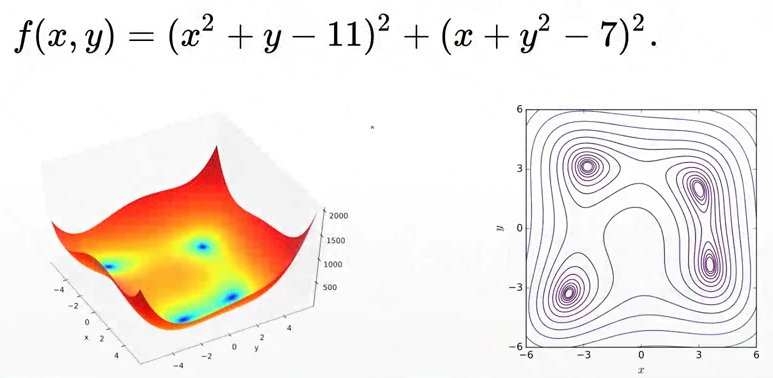

极值点
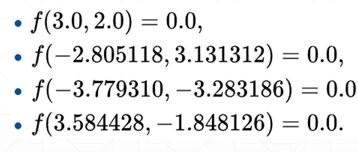

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
print('finish')

finish


In [12]:
# 拟合函数
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0]+x[1]**2-7)**2

In [13]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])
Z.shape


(120, 120)

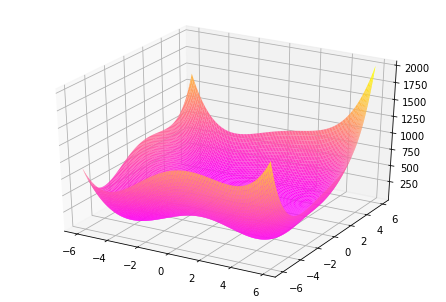

In [15]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure() #创建一张图片
ax3d=Axes3D(fig)
ax3d.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.spring)

plt.show()

In [24]:
x = tf.constant([-4.,0.])
for i in range(300):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = f(x)
    grads = tape.gradient(y,[x])[0]
    x -= 0.001*grads
    

In [26]:
x

<tf.Tensor: id=127608, shape=(2,), dtype=float32, numpy=array([-3.7793028, -3.283174 ], dtype=float32)>

### fashion_mnist

In [4]:
(x,y),(x_t,y_t) = keras.datasets.fashion_mnist.load_data()


In [5]:
x.shape

(60000, 28, 28)

In [6]:
# 数据预处理
def data_process(data):
    # 归一化
    new_x = tf.reshape(data[0],[-1,28*28])
    new_x = new_x/255.
    new_y = tf.one_hot(data[1],depth=10)
    return new_x,new_y

In [7]:
(x,y) = data_process([x,y])
x.shape

TensorShape([60000, 784])

In [38]:

def ANN(x,y,iters = 100,lr = 0.01):
    w1 = tf.Variable(tf.random.normal([28*28,1000]))
    b1 = tf.Variable(tf.zeros([1000]))
    w2 = tf.Variable(tf.random.normal([1000,500]))
    b2 = tf.Variable(tf.zeros([500]))
    w3 = tf.Variable(tf.random.normal([500,10]))
    b3 = tf.Variable(tf.zeros([10]))
    for i in range(iters):
        
        with tf.GradientTape() as tape:
            o1 = tf.nn.relu(x@w1+b1)
            o2 = tf.nn.relu(o1@w2+b2)
            o3 = tf.nn.softmax(o2@w3+b3)
            loss = tf.reduce_mean(tf.losses.categorical_crossentropy(y,o3))
            grads = tape.gradient(loss,[w1,b1,w2,b2,w3,b3])
            if i%50 == 0:
                print('step = ' , i,', loss = ' , float(loss))
        w1.assign_sub(lr*grads[0])
        b1.assign_sub(lr*grads[1])
        w2.assign_sub(lr*grads[2])
        b2.assign_sub(lr*grads[3])
        w3.assign_sub(lr*grads[4])
        b3.assign_sub(lr*grads[5])
    return w1,b1,w2,b2,w3,b3

In [39]:
params = ANN(x,y)

step =  0 , loss =  15.78341007232666
step =  50 , loss =  15.61464786529541


In [23]:
(x_t,y_t_onehot) = data_process([x_t,y_t])


In [24]:
len(y_t)
x_t.shape

TensorShape([10000, 784])

In [34]:
def predict(x,y,model_param):
    w1,b1,w2,b2,w3,b3 = model_param
    o1 = tf.nn.relu(x@w1+b1)
    o2 = tf.nn.relu(o1@w2+b2)
    o3 = tf.nn.softmax(o2@w3+b3)
    y_pred = tf.argmax(o3,axis=1)
    j = tf.equal(y_pred,y)
    j = tf.cast(j,dtype=tf.float32)
    acc = tf.reduce_mean(j)
    return acc

In [35]:
acc = predict(x_t,y_t,params)

In [36]:
acc

<tf.Tensor: id=483099, shape=(), dtype=float32, numpy=0.3727>